In [1]:
# CARMA data are public from here:
carma_3mm = ['https://drum.lib.umd.edu/bitstream/handle/1903/20049/gc_carma15_continuum.fits?sequence=15&isAllowed=y',
             'https://drum.lib.umd.edu/bitstream/handle/1903/20049/gc_carma8_continuum.fits?sequence=16&isAllowed=y',
             'https://drum.lib.umd.edu/bitstream/handle/1903/20049/gc_carma15%2b8_continuum.fits?sequence=17&isAllowed=y',
             'https://drum.lib.umd.edu/bitstream/handle/1903/20049/gc_carma8_20arcsec.fits?sequence=18&isAllowed=y']

In [2]:
# MUSTANG data from here:
mustang = {'SgrB2_5pass_1_.0.2_10mJy_10mJy_w_session5_final_smooth4_PlanckCombined.fits':
           'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HPATJB/Q904SP',
           'SgrB2_5pass_1_.0.2_10mJy_10mJy_w_session5_final_smooth4.fits':
           'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HPATJB/4HVIXV'}

In [3]:
# ACES data are not yet public

In [4]:
%matplotlib inline
from astropy import visualization as vis
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
from astropy.io import fits
from astropy import wcs
from spectral_cube import SpectralCube, Projection

In [5]:
from astropy import units as u

In [6]:
def finalize(ax):
    ll = ax.wcs.world_to_pixel_values(-0.7, -0.3)
    ur = ax.wcs.world_to_pixel_values(0.9, 0.2)
    ax.axis([ur[0], ll[0], ll[1], ur[1]])
    ax.coords['glon'].set_axislabel('Galactic Longitude', fontsize=18)
    ax.coords['glat'].set_axislabel('Galactic Latitude', fontsize=18)
    ax.coords['glon'].set_major_formatter('d.dd')
    ax.coords['glat'].set_major_formatter('d.dd')
    ax.coords['glon'].set_ticks(spacing=0.25*u.deg)
    ax.coords['glon'].set_ticklabel(fontsize=17)
    ax.coords['glat'].set_ticklabel(fontsize=17)    

In [7]:
def show(cube, max_percent=99.99, min_percent=0, stretch='asinh'):
    pl.figure(figsize=(12,12))
    ax = pl.subplot(projection=cube.wcs.celestial)
    ax.imshow(cube[0].value, 
              norm=vis.simple_norm(cube[0].value,
                                   stretch=stretch,
                                   max_percent=max_percent,
                                   min_percent=min_percent),
              cmap='gray_r'
             )
    finalize(ax)
    return ax

In [8]:
def show2d(hdu, min_percent=0.1, max_percent=99.99, stretch='log'):
    pl.figure(figsize=(12,12))
    ax = pl.subplot(projection=wcs.WCS(hdu.header).celestial)
    ax.imshow(hdu.data, 
              norm=vis.simple_norm(hdu.data,
                                   stretch=stretch,
                                   min_percent=min_percent,
                                   max_percent=max_percent),
              cmap='gray_r'
             )
    finalize(ax)
    return ax

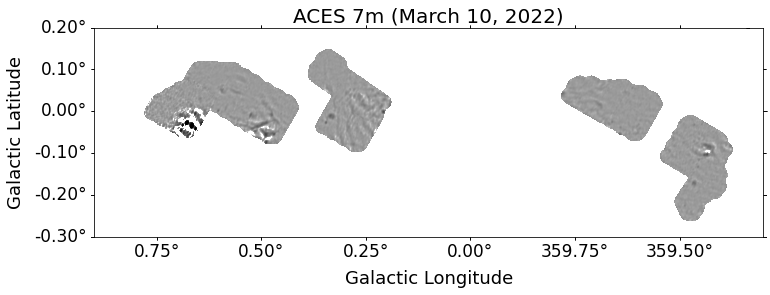

In [9]:
ax = show2d(fits.open('/orange/adamginsburg/ACES/mosaics/7m_continuum_mosaic.fits')[0],
            max_percent=99.9,
            min_percent=2)
pl.title("ACES 7m (March 10, 2022)", fontsize=20)
pl.savefig("ACES_7m_20220310.png")

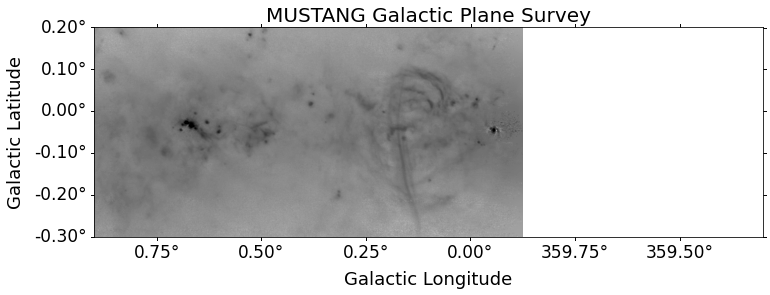

In [10]:
show2d(fits.open('/orange/adamginsburg/mgps/mgps/SgrB2/SgrB2_5pass_1_.0.2_10mJy_10mJy_w_session5_final_smooth4_PlanckCombined.fits')[0])
pl.title("MUSTANG Galactic Plane Survey", fontsize=20)
pl.savefig("MUSTANG_Planck.png")

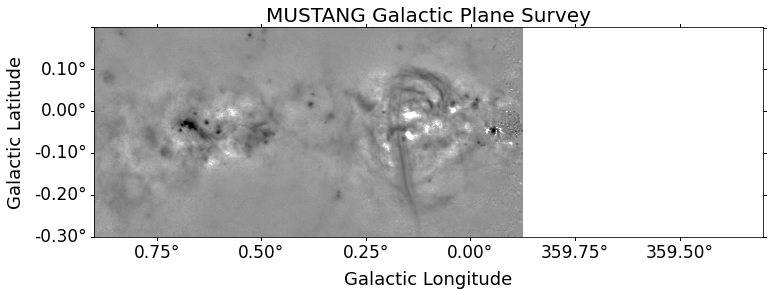

In [11]:
show2d(fits.open('/orange/adamginsburg/mgps/mgps/SgrB2/SgrB2_5pass_1_.0.2_10mJy_10mJy_w_session5_final_smooth4.fits')[0])
pl.title("MUSTANG Galactic Plane Survey", fontsize=20)
pl.savefig("MUSTANG_NoPlanck.png")

Text(0.5, 1.0, 'CARMA CMZ Survey')

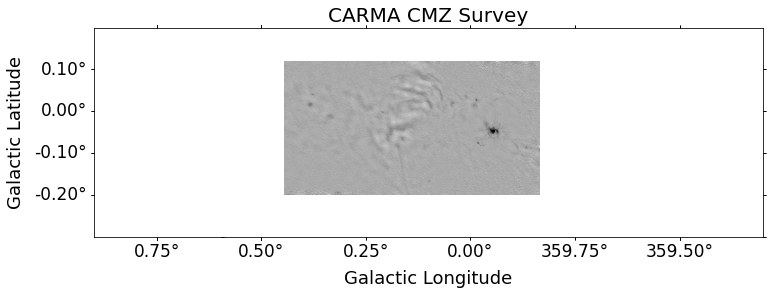

In [12]:
show(SpectralCube.read('/orange/adamginsburg/cmz/carma/gc_carma15%2b8_continuum.fits'))
pl.title("CARMA CMZ Survey", fontsize=20)

Text(0.5, 1.0, 'CARMA CMZ Survey')

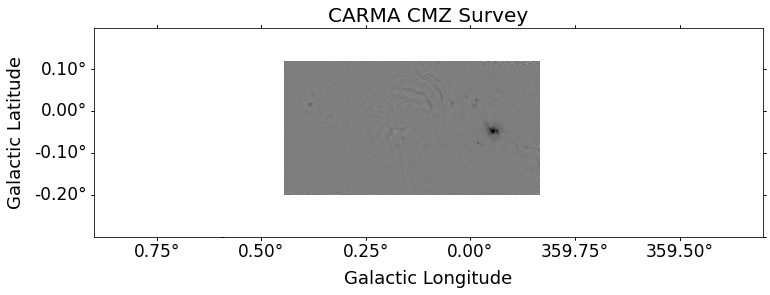

In [13]:
show(SpectralCube.read('/orange/adamginsburg/cmz/carma/gc_carma15_continuum.fits'))
pl.title("CARMA CMZ Survey", fontsize=20)

Text(0.5, 1.0, 'CARMA CMZ Survey')

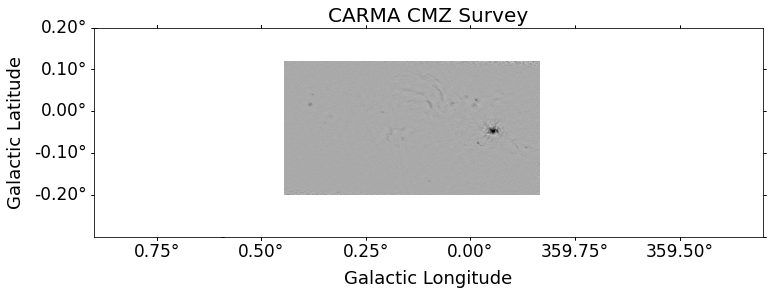

In [14]:
show(SpectralCube.read('/orange/adamginsburg/cmz/carma/gc_carma15_justc0922_continuum.fits'))
pl.title("CARMA CMZ Survey", fontsize=20)

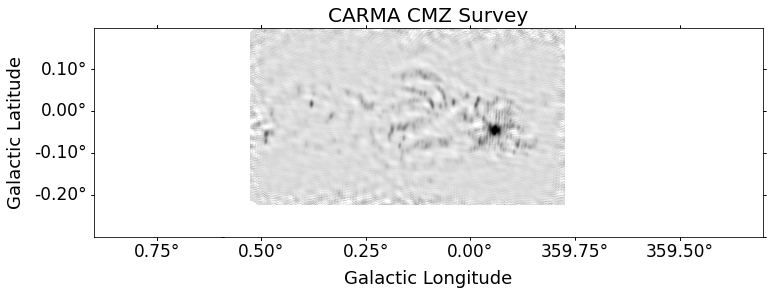

In [15]:
show(SpectralCube.read('/orange/adamginsburg/cmz/carma/gc_carma8_continuum.fits'), min_percent=1, max_percent=99.95)
pl.title("CARMA CMZ Survey", fontsize=20)
pl.savefig("CARMA_8.png")